In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

style.use("Solarize_Light2")

### DATA

In [2]:
# X = np.array([1, 2, 3, 4, 5])
# y = np.array([3, 4, 2, 4, 5])


data = pd.read_csv("test.csv")

data.sort_values(by=['x'], inplace=True)



# LINEAR REGRESSION 

 Dalam Statistik, regresi linear merupakan pendekatan untuk memodelkan hubungan antara suatu variabel dependen dengan satu atau lebih variabel independen. Salah satu aplikasi dari regresi linier adalah untuk melakukan prediksi berdasarkan data-data yang telah dimiliki sebelumnya

#### LINEAR REGRESSION FROM SCRATCH

In [3]:
plt.scatter(X, y)
# plt.ylim(0, 6)


NameError: name 'X' is not defined

$$
  y = mx + c
$$




$$
  m = \frac{\sum (x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}
$$

In [ ]:
def X_head(X, X_mean):
    hasil = []
    for i in range(len(X)):
        hasil.append(X[i] - X_mean)
        
    return np.array(hasil)

def y_head(y, y_mean):
    hasil = []
    for i in range(len(y)):
        hasil.append(y[i] - y_mean)
         
    return np.array(hasil)

def m_value(X, y, xhead, yhead):
    x_squared = []
    # print(X_head)
    xy = []
    for i in range(len(X)):
       x_squared.append(xhead[i]**2)
       xy.append(round((xhead[i])*(yhead[i]), 1))
        # print(xy)
        
    return sum(xy)/sum(x_squared)
    

In [ ]:
X_mean = np.mean(X)
y_mean = np.mean(y)

yHead = y_head(y, y_mean)
xHead = X_head(X, X_mean)

xHead


array([-2., -1.,  0.,  1.,  2.])

In [ ]:
# m_value(X, y, xHead, yHead)

m = m_value(X, y, xHead, yHead)
m

0.4

### MENCARI NILAI C

In [ ]:
def c_value(y, m, x):
    return np.abs(m * x - y)


In [ ]:
c = c_value(y_mean, m_value(X, y, xHead, yHead), X_mean)

print(y_mean)
print(m_value(X, y, xHead, yHead))
print(X_mean)
c

3.6
0.4
3.0


2.4

### GRADIENT DESCENT

In [ ]:
def gradien(m, x, c):
    y = (m*x) + c
    return y



In [ ]:
y_pred = []

for i in range(len(X)):
    gradient = (gradien(m, X[i], c))
    y_pred.append(gradient)
    print(gradient)
    

# y_pred

2.8
3.2
3.6
4.0
4.4


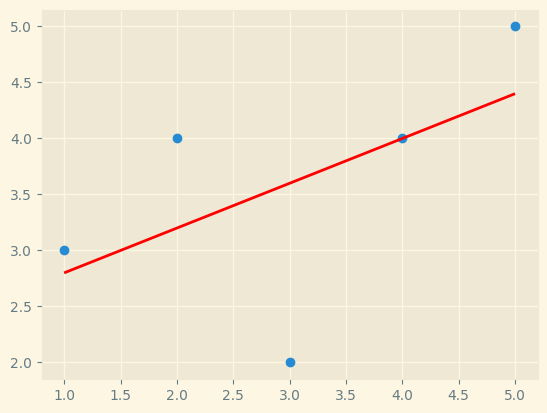

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")

# y_pred

### R SQUARED


In [ ]:
(y_pred - y_mean)**2

# (y - y_mean)**2

array([0.64, 0.16, 0.  , 0.16, 0.64])

In [ ]:
def r2(y_actual, y_mean, y_predd, yhead):
    pembilang = []
    penyebut = []
    
    for i in range(len(y_pred)):
        atas = (y_pred[i] - y_mean)**2
        bawah = (y_actual[i] - y_mean)**2
        pembilang.append(round(atas, 3))
        penyebut.append(round(bawah, 3))
        
    # print(sum(pembilang))
    
    return round(sum(pembilang)/sum(penyebut), 3)

In [ ]:
r2(y, y_mean, y_pred, yHead)

0.308

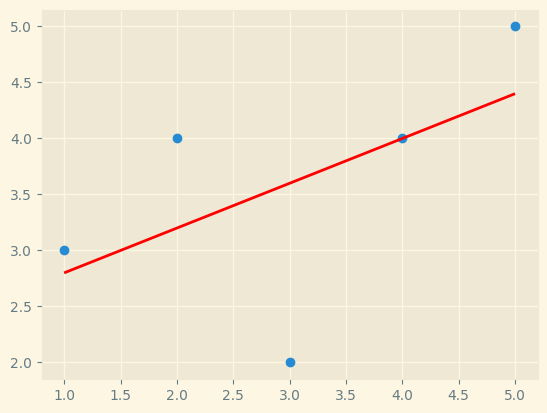

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color="red")

## MENGGUNAKAN SCIKIT LEARN

In [ ]:
from sklearn.linear_model import LinearRegression

0.308


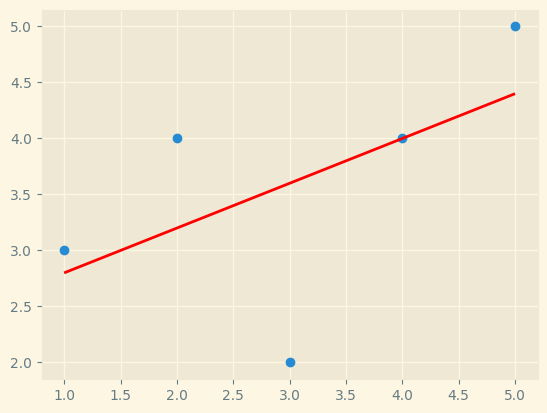

In [ ]:
model = LinearRegression()

Xx = X.reshape(-1, 1)
yy = y.reshape(-1, 1)

model.fit(Xx, yy)
y_predd = model.predict(Xx)

r2_score = round(model.score(Xx, yy), 3)
print(r2_score)

plt.scatter(X, y)
plt.plot(X, y_predd, color="red")